# Data Wrangling
## Predicting Rates of Chronic Absenteeism

## Imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pandas_profiling import ProfileReport

## Load Data 

In [2]:
#change directory to get external_data directory
os.getcwd()

'/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_3/Capstone_3/notebooks'

In [3]:
path= '/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_3/Capstone_3/data/external'
os.chdir(path)

In [4]:
#load NYC attendance data
attendance = pd.read_csv('2013-2019_Attendance_Results_-_School.csv')

In [5]:
attendance

,DBN,School Name,Grade,Year,Demographic Category,Demographic Variable,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 20+ Total Days,# Chronically Absent,% Chronically Absent
0,01M015,P.S. 015 Roberto Clemente,All Grades,2013-14,All Students,All Students,34803,2783,32020,92.0,216,58,26.9
1,01M015,P.S. 015 Roberto Clemente,All Grades,2014-15,All Students,All Students,33455,2374,31081,92.9,197,46,23.4
2,01M015,P.S. 015 Roberto Clemente,All Grades,2015-16,All Students,All Students,29840,2071,27769,93.1,186,51,27.4
3,01M015,P.S. 015 Roberto Clemente,All Grades,2016-17,All Students,All Students,30601,1994,28607,93.5,193,48,24.9
4,01M015,P.S. 015 Roberto Clemente,All Grades,2017-18,All Students,All Students,33264,2078,31186,93.8,195,37,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824141,75X811,P.S. X811,12,2016-17,ELL Status,Not ELL,32558,5543,27015,83.0,192,98,51.0
824142,75X811,P.S. X811,12,2017-18,ELL Status,ELL,22818,4079,18739,82.1,133,81,60.9
824143,75X811,P.S. X811,12,2017-18,ELL Status,Not ELL,34542,5791,28751,83.2,201,112,55.7
824144,75X811,P.S. X811,12,2018-19,ELL Status,ELL,24910,4837,20073,80.6,147,98,66.7


## Data Definition 

In [6]:
#Call the info method to see a summary of the data
attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824146 entries, 0 to 824145
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   DBN                            824146 non-null  object
 1   School Name                    824146 non-null  object
 2   Grade                          824146 non-null  object
 3   Year                           824146 non-null  object
 4   Demographic Category           824146 non-null  object
 5   Demographic Variable           824146 non-null  object
 6   # Total Days                   824146 non-null  int64 
 7   # Days Absent                  824146 non-null  object
 8   # Days Present                 824146 non-null  object
 9   % Attendance                   824146 non-null  object
 10  # Contributing 20+ Total Days  824146 non-null  object
 11  # Chronically Absent           824146 non-null  object
 12  % Chronically Absent           824146 non-nu

In [7]:
#check NaNs
attendance.isna().sum()/len(attendance)*100

DBN                              0.0
School Name                      0.0
Grade                            0.0
Year                             0.0
Demographic Category             0.0
Demographic Variable             0.0
# Total Days                     0.0
# Days Absent                    0.0
# Days Present                   0.0
% Attendance                     0.0
# Contributing 20+ Total Days    0.0
# Chronically Absent             0.0
% Chronically Absent             0.0
dtype: float64

In [8]:
#check number of unique values 
attendance.nunique()

DBN                               1631
School Name                       1627
Grade                               15
Year                                 6
Demographic Category                 6
Demographic Variable                14
# Total Days                     86622
# Days Absent                    16803
# Days Present                   81135
% Attendance                       666
# Contributing 20+ Total Days     2441
# Chronically Absent               935
% Chronically Absent               985
dtype: int64

In [9]:
#define function to check unique values as percent of total
def get_unique_values(dataframe):
    '''get unique values for each column'''
    for col in dataframe.columns:
        print(col)
        print(dataframe[col].value_counts()/len(dataframe[col])*100)
        print('\n')

In [10]:
#check unique values as percent of total for each column
get_unique_values(attendance)

DBN
31R080    0.141722
01M539    0.135534
75Q993    0.131773
75X188    0.129953
75K369    0.128254
            ...   
19K907    0.003155
16K898    0.002912
09X593    0.002669
19K260    0.002669
23K332    0.002427
Name: DBN, Length: 1631, dtype: float64


School Name
P.S. 212                                              0.164049
P.S. 253                                              0.150944
The Michael J. Petrides School                        0.141722
New Explorations into Science, Technology and Math    0.135534
P.S. Q993                                             0.131773
                                                        ...   
M.S. 907                                              0.003155
The Brooklyn Green School                             0.002912
P.S. 260 Breuckelen                                   0.002669
South Bronx International Middle School               0.002669
P.S. 332 Charles H. Houston                           0.002427
Name: School Name, Length: 1627, dtype: 

In [11]:
attendance.columns

Index(['DBN', 'School Name', 'Grade', 'Year', 'Demographic Category',
       'Demographic Variable', '# Total Days', '# Days Absent',
       '# Days Present', '% Attendance', '# Contributing 20+ Total Days',
       '# Chronically Absent', '% Chronically Absent'],
      dtype='object')

In [12]:
#replace 's' objects with NaNs in attedance data
attendance['# Days Absent'].replace('s', np.nan, inplace=True)
attendance['# Days Present'].replace('s', np.nan, inplace=True)
attendance['% Attendance'].replace('s', np.nan, inplace=True)
attendance['# Contributing 20+ Total Days'].replace('s', np.nan, inplace=True)
attendance['# Chronically Absent'].replace('s', np.nan, inplace=True)
attendance['% Chronically Absent'].replace('s', np.nan, inplace=True)

In [13]:
#define functions to get NaNs as % 
def NaNs_as_percent(dataframe):
    '''show % NaNs for each column'''
    print(dataframe.isna().sum()/len(dataframe)*100)

In [14]:
#get NaNs as % for each column
NaNs_as_percent(attendance)

DBN                               0.000000
School Name                       0.000000
Grade                             0.000000
Year                              0.000000
Demographic Category              0.000000
Demographic Variable              0.000000
# Total Days                      0.000000
# Days Absent                    26.175823
# Days Present                   26.175823
% Attendance                     26.175823
# Contributing 20+ Total Days    26.175823
# Chronically Absent             26.782876
% Chronically Absent             26.782876
dtype: float64


In [15]:
#change data types to float for numeric columns
attendance = attendance.astype({'# Days Absent': 'float', '# Days Present': 'float', '% Attendance': 'float', '# Contributing 20+ Total Days': 'float', '# Chronically Absent': 'float', '% Chronically Absent': 'float'})

In [16]:
#check to ensure dytype conversion was sucessful
attendance.dtypes

DBN                               object
School Name                       object
Grade                             object
Year                              object
Demographic Category              object
Demographic Variable              object
# Total Days                       int64
# Days Absent                    float64
# Days Present                   float64
% Attendance                     float64
# Contributing 20+ Total Days    float64
# Chronically Absent             float64
% Chronically Absent             float64
dtype: object

In [17]:
#define function to print pandas profiling report and save as html
def show_save_pandas_profiling(dataframe, directory_path, filename):
    '''create and save pandas profiling report as html'''
    profile = ProfileReport(dataframe)
    os.chdir(directory_path)
    profile.to_file(filename)
    print(profile)

In [18]:
#show_save_pandas_profiling(attendance, '/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_3/Capstone_3/reports', 'notebook-1.0-data-definition.html')

In [19]:
#check describe() on the data
attendance.describe()

,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 20+ Total Days,# Chronically Absent,% Chronically Absent
count,824146.000000,608419.000000,608419.000000,608419.000000,608419.000000,603416.000000,603416.000000
mean,14454.985156,1491.243600,16858.884162,91.296638,110.238244,27.967416,27.720952
std,29094.942696,2864.866744,30011.053087,5.333851,195.738218,52.326790,18.062075
min,1.000000,0.000000,8.000000,0.700000,5.000000,0.000000,0.000000
25%,1849.000000,298.000000,3670.000000,89.400000,24.000000,5.000000,13.500000
50%,6224.000000,646.000000,8009.000000,92.600000,53.000000,12.000000,25.000000
75%,14270.000000,1423.000000,16020.000000,94.700000,105.000000,28.000000,39.400000
max,976375.000000,105055.000000,934266.000000,100.000000,5940.000000,1596.000000,100.000000


It seems #Total Days/# Days Absent/# Days Present/# Contributing 20+ Days/# Total Days/# Chronically Absent have HUGE outliers, and are highly skewed

From the Corellation it seems That % Chronically Absent is highly negatively correlated with % Attendance. Which makes sense. Schools that have low attendance numbers in general would have high chronically absent numbers.

The profiling report found the following warnings (see specifically the independent variables that are highly correlated with each other):

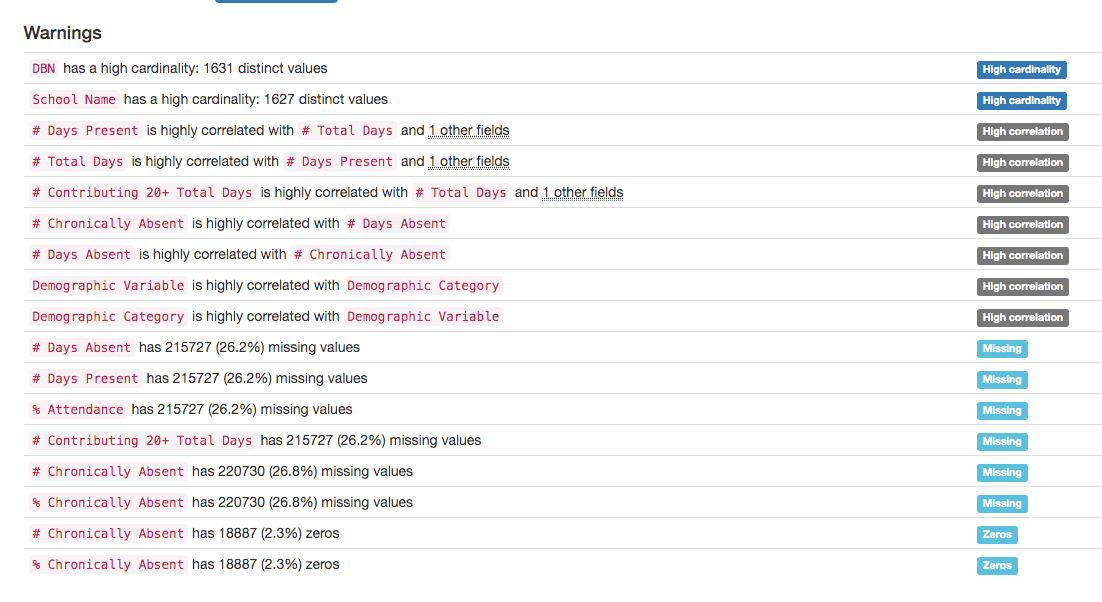



Here are the descriptive statistics and a histogram of target variable '% Chronically Absent'.
It seems most values fall in 13.5%-34.9%

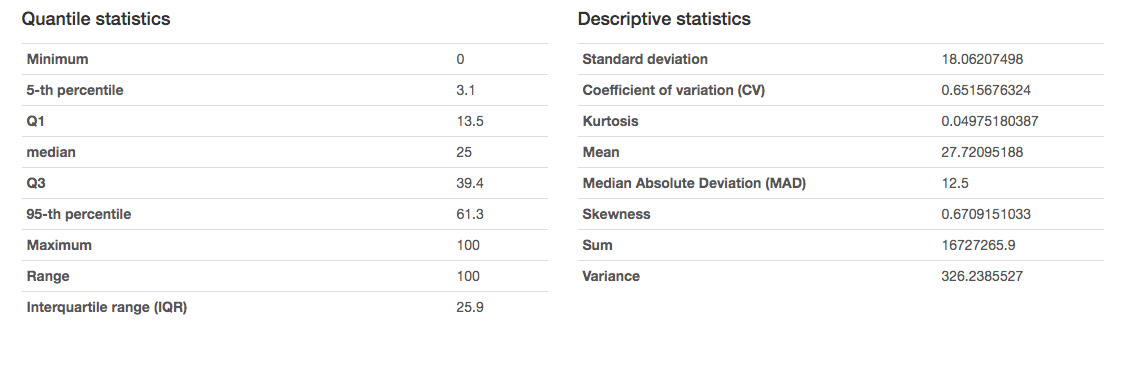

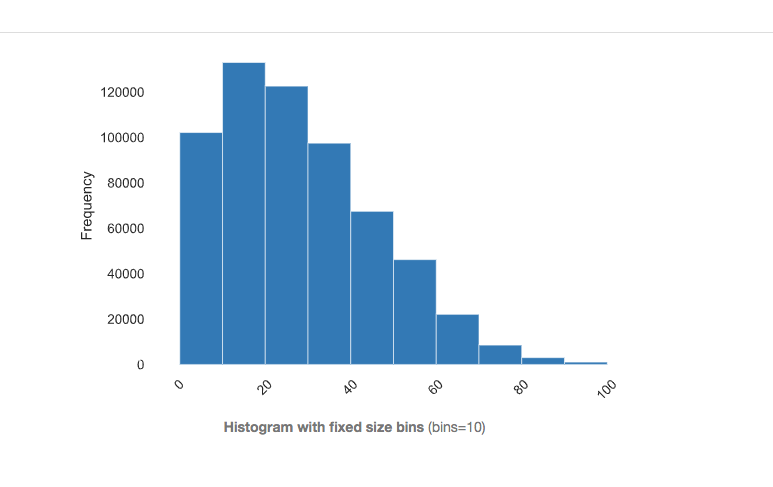

## Data Cleaning 

#### Dealing with NaNs 

In [20]:
#look at NaNs for each column
NaNs_as_percent(attendance)

DBN                               0.000000
School Name                       0.000000
Grade                             0.000000
Year                              0.000000
Demographic Category              0.000000
Demographic Variable              0.000000
# Total Days                      0.000000
# Days Absent                    26.175823
# Days Present                   26.175823
% Attendance                     26.175823
# Contributing 20+ Total Days    26.175823
# Chronically Absent             26.782876
% Chronically Absent             26.782876
dtype: float64


In [21]:
attendance.columns

Index(['DBN', 'School Name', 'Grade', 'Year', 'Demographic Category',
       'Demographic Variable', '# Total Days', '# Days Absent',
       '# Days Present', '% Attendance', '# Contributing 20+ Total Days',
       '# Chronically Absent', '% Chronically Absent'],
      dtype='object')

In [22]:
#all 6 columns have NaNs in the same rows, I wonder why?
attendance.loc[attendance['# Days Absent'].isna()]

,DBN,School Name,Grade,Year,Demographic Category,Demographic Variable,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 20+ Total Days,# Chronically Absent,% Chronically Absent
9,01M015,P.S. 015 Roberto Clemente,PK in K-12 Schools,2016-17,All Students,All Students,2844,NaN,NaN,NaN,NaN,NaN,NaN
48,01M015,P.S. 015 Roberto Clemente,6,2016-17,All Students,All Students,169,NaN,NaN,NaN,NaN,NaN,NaN
106,01M020,P.S. 020 Anna Silver,PK in K-12 Schools,2016-17,All Students,All Students,7449,NaN,NaN,NaN,NaN,NaN,NaN
145,01M020,P.S. 020 Anna Silver,6,2016-17,All Students,All Students,338,NaN,NaN,NaN,NaN,NaN,NaN
155,01M034,P.S. 034 Franklin D. Roosevelt,PK in K-12 Schools,2016-17,All Students,All Students,2403,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824118,75X811,P.S. X811,10,2017-18,ELL Status,ELL,5445,NaN,NaN,NaN,NaN,NaN,NaN
824119,75X811,P.S. X811,10,2017-18,ELL Status,Not ELL,9953,NaN,NaN,NaN,NaN,NaN,NaN
824122,75X811,P.S. X811,11,2013-14,ELL Status,ELL,2444,NaN,NaN,NaN,NaN,NaN,NaN
824123,75X811,P.S. X811,11,2013-14,ELL Status,Not ELL,5951,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#check all NaNs in same row
NaNs_as_percent(attendance.loc[attendance['# Days Absent'].isna()])

DBN                                0.0
School Name                        0.0
Grade                              0.0
Year                               0.0
Demographic Category               0.0
Demographic Variable               0.0
# Total Days                       0.0
# Days Absent                    100.0
# Days Present                   100.0
% Attendance                     100.0
# Contributing 20+ Total Days    100.0
# Chronically Absent             100.0
% Chronically Absent             100.0
dtype: float64


In [24]:
attendance.columns

Index(['DBN', 'School Name', 'Grade', 'Year', 'Demographic Category',
       'Demographic Variable', '# Total Days', '# Days Absent',
       '# Days Present', '% Attendance', '# Contributing 20+ Total Days',
       '# Chronically Absent', '% Chronically Absent'],
      dtype='object')

In [25]:
#separate data into a subset with only rows with nulls and a subset with no null values
no_nulls = attendance[attendance[['# Days Absent',
       '# Days Present', '% Attendance', '# Contributing 20+ Total Days',
       '# Chronically Absent', '% Chronically Absent']].notnull().all(1)]
nulls = attendance.loc[attendance['# Days Absent'].isna()]

In [26]:
#groupby different variables to try and pick up trends to learn more about the NaNs
#data subset for NaNs compared to the full data set
(nulls.groupby(['Demographic Category']).count() / attendance.groupby(['Demographic Category']).count()*100).sort_values('DBN', ascending=False).head(75)

,DBN,School Name,Grade,Year,Demographic Variable,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 20+ Total Days,# Chronically Absent,% Chronically Absent
Demographic Category,,,,,,,,,,,,
Ethnicity,44.979061,44.979061,44.979061,44.979061,44.979061,44.979061,0.0,0.0,0.0,0.0,0.0,0.0
ELL Status,32.406313,32.406313,32.406313,32.406313,32.406313,32.406313,0.0,0.0,0.0,0.0,0.0,0.0
Poverty,23.883595,23.883595,23.883595,23.883595,23.883595,23.883595,0.0,0.0,0.0,0.0,0.0,0.0
SWD Status,11.852752,11.852752,11.852752,11.852752,11.852752,11.852752,0.0,0.0,0.0,0.0,0.0,0.0
Gender,6.253210,6.253210,6.253210,6.253210,6.253210,6.253210,0.0,0.0,0.0,0.0,0.0,0.0
All Students,4.363670,4.363670,4.363670,4.363670,4.363670,4.363670,0.0,0.0,0.0,0.0,0.0,0.0


**Notes on the NaNs vs Full Data Set**
- 'Year' - most of the NaNs are evenly spread by year, with slightly more in 2013-2014, & 2014-2016 school years
- 'Grade' - most of NaNs are in 'PK in K-12 Schools', middle schools, grades - 6, 9, 7, 11, 8 
- 'Demographic Category' Most of the NaNs are from Ethnicity, ELL Status, Poverty, and SWD Status
- 'Demographic Variable' Most of the Nans are from: Other, White, Asian, Black, ELL, Not ELL, Poverty, Not Poverty

In [27]:
#compare nulls to non null data
(nulls.groupby('School Name').count() / no_nulls.groupby('School Name').count()*100).sort_values('DBN', ascending=False).head(75)

,DBN,Grade,Year,Demographic Category,Demographic Variable,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 20+ Total Days,# Chronically Absent,% Chronically Absent
School Name,,,,,,,,,,,,
P.S. 022,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,0.0,0.0,0.0,0.0,0.0,0.0
Satellite Three,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,0.0,0.0,0.0,0.0,0.0,0.0
P.S. 030 Queens,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,0.0,0.0,0.0,0.0,0.0,0.0
Academy of Environmental Science Secondary High Sc,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,0.0,0.0,0.0,0.0,0.0,0.0
Monroe Academy for Business/Law,455.555556,455.555556,455.555556,455.555556,455.555556,455.555556,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Young Scholars' Academy for Discovery and Explorat,102.877698,102.877698,102.877698,102.877698,102.877698,102.877698,0.0,0.0,0.0,0.0,0.0,0.0
Ebbets Field Middle School,100.574713,100.574713,100.574713,100.574713,100.574713,100.574713,0.0,0.0,0.0,0.0,0.0,0.0
The Brooklyn Green School,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0


**Notes on the NaNs vs non Null Data Set**
- 'School Name' There are 74 schools with the same or more amount of NaNs as Non Nans
    - Highest include PS 022, Satelitte Three
    - Some of the schools that I checked with the highest ratio of null to non null counts are currently closed. But not all of the schools with a lower ratio are closed
- 'Year' - most of the NaNs are evenly spread by year, with slightly more in 2013-2014, & 2014-2016 school years
- 'Grade' - most of NaNs are in 'PK in K-12 Schools'
- 'Demographic Category' Most of the NaNs are from Ethnicity, ELL Status, Poverty,
- 'Demographic Variable' There are more NaNs than non Nans for: Other, White, Asian

In [28]:
#look closer at schoolo name NaN counts
nulls.groupby('School Name').count().sort_values('DBN', ascending=False).head(75)

,DBN,Grade,Year,Demographic Category,Demographic Variable,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 20+ Total Days,# Chronically Absent,% Chronically Absent
School Name,,,,,,,,,,,,
P.S. 368,668,668,668,668,668,668,0,0,0,0,0,0
P.S. K077,562,562,562,562,562,562,0,0,0,0,0,0
P.S. 370,534,534,534,534,534,534,0,0,0,0,0,0
P.S. 36,523,523,523,523,523,523,0,0,0,0,0,0
P.S. M226,514,514,514,514,514,514,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
P.S. Q004,280,280,280,280,280,280,0,0,0,0,0,0
P.S. 3 Raul Julia Micro Society,279,279,279,279,279,279,0,0,0,0,0,0
P.S. Q993,278,278,278,278,278,278,0,0,0,0,0,0


In [29]:
#look at number unique of data with NaNs
nulls.nunique()

DBN                               1631
School Name                       1627
Grade                               15
Year                                 6
Demographic Category                 6
Demographic Variable                14
# Total Days                     23033
# Days Absent                        0
# Days Present                       0
% Attendance                         0
# Contributing 20+ Total Days        0
# Chronically Absent                 0
% Chronically Absent                 0
dtype: int64

In [30]:
#look at number unique of data without NaNS
#none of the unique categorical variables are missing due to NaNs
no_nulls.nunique()

DBN                               1631
School Name                       1627
Grade                               15
Year                                 6
Demographic Category                 6
Demographic Variable                14
# Total Days                     84564
# Days Absent                    16793
# Days Present                   80995
% Attendance                       665
# Contributing 20+ Total Days     2439
# Chronically Absent               934
% Chronically Absent               984
dtype: int64

It seems that the two options for dealing with NaNs would be to either drop the NaNs entirely. But this would leave out a lot of data regarding Demographic Category, specifically Ethinicity, as well as certain schools.
Another idea would be to try and replace the NaNs based on the mean score of that variable from the certain School: certain Year: certain Demographic Category and Variable. 

An email was sent to NYC OpenData on 12/14/20 so inquire about the non-numeric data (remember 's' was in each of these variables before I replaced it with NaNs). They may be able to shed light on what these NaNs may represent, helping me decide how best to move foward.

### Note on dealing with NaNs 
**Added 1/4/21**

An email was sent to NYC OpenData on 12/14/20 so inquire about the non-numeric data (remember 's' was in each of these variables before I replaced it with NaNs). The reponse fom NYC OpendData was such, "When data counts are low so as to potentially result in the identification of students, those numbers are redacted. the 's' indicates a low number that we have redacted."

Due to this on 1/4/21 decided to drop this NaN data from the data set.

In [31]:
attendance = attendance.dropna()

####  Creating Variable 'Next Year % Chronically Absent'
This will be our target variable in order to predict the next year's chronically absent number may be. We will be able to do this by school, by grade, demographic category, and demographic variable.

In [32]:
#separate each school year into it's own dataframe
df_13_14 = attendance.loc[attendance['Year'] == '2013-14']
df_14_15 = attendance.loc[attendance['Year'] == '2014-15']
df_15_16 = attendance.loc[attendance['Year'] == '2015-16']
df_16_17 = attendance.loc[attendance['Year'] == '2016-17']
df_17_18 = attendance.loc[attendance['Year'] == '2017-18']
df_18_19 = attendance.loc[attendance['Year'] == '2018-19']

In [33]:
#rename % Chronically Absent columns for merge
df_14_15_next = df_14_15.rename(columns= {'% Chronically Absent': 'Next Year % Chronically Absent'})
df_15_16_next = df_15_16.rename(columns= {'% Chronically Absent': 'Next Year % Chronically Absent'})
df_16_17_next = df_16_17.rename(columns= {'% Chronically Absent': 'Next Year % Chronically Absent'})
df_17_18_next = df_17_18.rename(columns= {'% Chronically Absent': 'Next Year % Chronically Absent'})
df_18_19_next = df_18_19.rename(columns= {'% Chronically Absent': 'Next Year % Chronically Absent'})

In [34]:
df_13_14.isna().sum()

DBN                              0
School Name                      0
Grade                            0
Year                             0
Demographic Category             0
Demographic Variable             0
# Total Days                     0
# Days Absent                    0
# Days Present                   0
% Attendance                     0
# Contributing 20+ Total Days    0
# Chronically Absent             0
% Chronically Absent             0
dtype: int64

In [35]:
df_14_15_next.columns

Index(['DBN', 'School Name', 'Grade', 'Year', 'Demographic Category',
       'Demographic Variable', '# Total Days', '# Days Absent',
       '# Days Present', '% Attendance', '# Contributing 20+ Total Days',
       '# Chronically Absent', 'Next Year % Chronically Absent'],
      dtype='object')

In [36]:
#merge data frames so each has the next year's %chronically absent column
df_13_14_hasNext = pd.merge(df_13_14, df_14_15_next.drop(['Year', '# Total Days', '# Days Absent', '# Days Present', '% Attendance', '# Chronically Absent', '# Contributing 20+ Total Days'], axis=1), how='left', on=['DBN', 'School Name', 'Grade', 'Demographic Category', 'Demographic Variable'])
df_14_15_hasNext = pd.merge(df_14_15, df_15_16_next.drop(['Year', '# Total Days', '# Days Absent', '# Days Present', '% Attendance', '# Chronically Absent', '# Contributing 20+ Total Days'], axis=1), how='left', on=['DBN', 'School Name', 'Grade', 'Demographic Category', 'Demographic Variable'])
df_15_16_hasNext = pd.merge(df_15_16, df_16_17_next.drop(['Year', '# Total Days', '# Days Absent', '# Days Present', '% Attendance', '# Chronically Absent', '# Contributing 20+ Total Days'], axis=1), how='left', on=['DBN', 'School Name', 'Grade', 'Demographic Category', 'Demographic Variable'])
df_16_17_hasNext = pd.merge(df_16_17, df_17_18_next.drop(['Year', '# Total Days', '# Days Absent', '# Days Present', '% Attendance', '# Chronically Absent', '# Contributing 20+ Total Days'], axis=1), how='left', on=['DBN', 'School Name', 'Grade', 'Demographic Category', 'Demographic Variable'])
df_17_18_hasNext = pd.merge(df_17_18, df_18_19_next.drop(['Year', '# Total Days', '# Days Absent', '# Days Present', '% Attendance', '# Chronically Absent', '# Contributing 20+ Total Days'], axis=1), how='left', on=['DBN', 'School Name', 'Grade', 'Demographic Category', 'Demographic Variable'])

In [37]:
#concat each year's data frame into one larger data frame
#new single data frame has 'Next Year % Chronically Absent' for each row'
df = pd.concat([df_13_14_hasNext, df_14_15_hasNext, df_15_16_hasNext, df_16_17_hasNext, df_17_18_hasNext, df_18_19], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603416 entries, 0 to 603415
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DBN                             603416 non-null  object 
 1   School Name                     603416 non-null  object 
 2   Grade                           603416 non-null  object 
 3   Year                            603416 non-null  object 
 4   Demographic Category            603416 non-null  object 
 5   Demographic Variable            603416 non-null  object 
 6   # Total Days                    603416 non-null  int64  
 7   # Days Absent                   603416 non-null  float64
 8   # Days Present                  603416 non-null  float64
 9   % Attendance                    603416 non-null  float64
 10  # Contributing 20+ Total Days   603416 non-null  float64
 11  # Chronically Absent            603416 non-null  float64
 12  % Chronically Ab

In [38]:
#note no duplicate rows were found in the data set

## Save Data

In [39]:
df.to_csv(r'/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_3/Capstone_3/data/interim/attendance_with_nextYear.csv', index=False)

### Things to Explore Further
- DBN has 4 more unique values than School Name
- what does 's' mean in absence data?, need to sub with NaNs - all are ~26%
- what does '# Contributing 20+ Days' column represent? (maybe number of students that were present or absent 20+ Days?
    - need to get total student count for by school per year to find out
- #Total Days/# Days Absent/# Days Present/# Contributing 20+ Days/# Total Days/# Chronically Absent have HUGE outliers, highly skewed
- create second dataframe with % chronically sbsent by year
- turn chronic absenteesim into a categorical value: high, medium, low

- deal with high correlation variables
- get images to work in this notebook

## Summary 

- loaded NYC attendance data

Data Definition
- Called the info method to see a summary of the data
- checked NaNs (none in data, later found 's' objects in numeric data) 
- checked number of unique values 
- checked unique values as percent of total (created function for this)
- replaced 's' objects with NaNs in attedance data
- defined functions to get NaNs as % and checked all columns
- #change data types to float for numeric columns
- define function to print pandas profiling report and save as html and did this 
- Notes from Pandas profiling
    - It seems the variables #Total Days/# Days Absent/# Days Present/# Contributing 20+ Days/# Total Days/# Chronically Absent have large outliers, and are highly skewed
    - From the Corellation Matrix it seems That % Chronically Absent is highly negatively correlated with % Attendance. Which makes sense. Schools that have low attendance numbers in general would have high chronically absent numbers.
    - for '% Chronically Absent' it seems most values fall in 13.5%-34.9%
    
Data Cleaning
- Dealing with NaNs
    - all 6 columns with NaNs have NaNs in the same rows, I wonder why?
    - separate data into a subset with only rows with nulls and a subset with no null values
    - used groupby() on different variables to try and pick up trends to learn more about the NaNs
    - compared data subset for NaNs compared to the full data set. 
        - Notes on the NaNs vs Full Data Set
            - 'Year' - most of the NaNs are evenly spread by year, with slightly more in 2013-2014, & 2014-2016 school years
            - 'Grade' - most of NaNs are in 'PK in K-12 Schools', middle schools, grades - 6, 9, 7, 11, 8
            - 'Demographic Category' Most of the NaNs are from Ethnicity, ELL Status, Poverty, and SWD Status
            - 'Demographic Variable' Most of the Nans are from: Other, White, Asian, Black, ELL, Not ELL, Poverty, Not Poverty
    - compared nulls to non null data. Found:
        - 'School Name' There are 74 schools with the same or more amount of NaNs as Non Nans
            - Highest include PS 022, Satelitte Three
            - Some of the schools that I checked with the highest ratio of null to non null counts are currently closed. But not all of the schools with a lower ratio are closed
        - 'Year' - most of the NaNs are evenly spread by year, with slightly more in 2013-2014, & 2014-2016 school years
        - 'Grade' - most of NaNs are in 'PK in K-12 Schools'
        - 'Demographic Category' Most of the NaNs are from Ethnicity, ELL Status, Poverty,
        - 'Demographic Variable' There are more NaNs than non Nans for: Other, White, Asian
        
     - looked closer at schoolo name NaN counts
     - looked at number unique of data with NaNs and compared with number unique of data without NaNS
     - found none of the unique categorical variables are missing due to NaNs

**It seems that the two options for dealing with NaNs would be to either drop the NaNs entirely. But this would leave out a lot of data regarding Demographic Category, specifically Ethinicity, as well as certain schools. Another idea would be to try and replace the NaNs based on the mean score of that variable from the certain School: certain Year: certain Demographic Category and Variable. An email was sent to NYC OpenData on 12/14/20 so inquire about the non-numeric data (remember 's' was in each of these variables before I replaced it with NaNs). They may be able to shed light on what these NaNs may represent, helping me decide how best to move foward.**

**Added 1/4/21.. An email was sent to NYC OpenData on 12/14/20 so inquire about the non-numeric data (remember 's' was in each of these variables before I replaced it with NaNs). The reponse fom NYC OpendData was such, "When data counts are low so as to potentially result in the identification of students, those numbers are redacted. the 's' indicates a low number that we have redacted." Due to this on 1/4/21 decided to drop this NaN data from the data set.**

- Creating Variable 'Next Year % Chronically Absent'. This will be our target variable in order to predict the next year's chronically absent number may be. We will be able to do this by school, by grade, demographic category, and demographic variable.
    - separate each school year into it's own dataframe
    - rename % Chronically Absent columns for merge
    - merge data frames so each has the next year's %chronically absent column
    - concat each year's data frame into one larger data frame
    - new single data frame has 'Next Year % Chronically Absent' for each row'
- Saved Data
- Made note on things to explore further
